In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ettouilebouael/churn_prediction/main/churn.csv', sep=',')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.groupby(['Dependents', "Churn"])["Churn"].count()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: Churn, dtype: int64

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
num_col = ["TotalCharges", "MonthlyCharges", "tenure"]

In [ ]:
df.isnull().sum(axis = 0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.TotalCharges = df.TotalCharges.replace(" ", np.NaN)
df.TotalCharges = pd.to_numeric(df.TotalCharges)

## Etude de la variable cible

In [ ]:
d=df.groupby("Churn")

In [ ]:
d

Text(0.5, 1.0, 'Déséquilibre des clients')

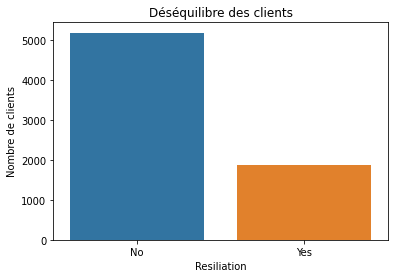

In [ ]:
sns.countplot(x="Churn", data=df)
plt.xlabel("Resiliation")
plt.ylabel("Nombre de clients")
plt.title("Déséquilibre des clients")

* Les classes sont déséquilibrées
* Les résiliation sont minoritaire

## Etudes des variables numériques

### Nombre de mois depuis la souscription

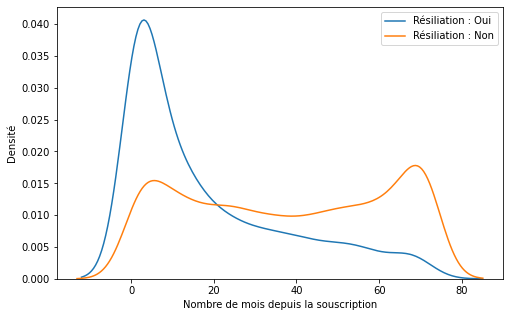

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df.Churn == "Yes","tenure"], label = "Résiliation : Oui")
sns.kdeplot(df.loc[df.Churn == "No","tenure"], label = "Résiliation : Non")
plt.xlabel("Nombre de mois depuis la souscription")
plt.ylabel("Densité")
plt.legend()

* Les nouveaux clients sont plus sucueptibles de résilier

### Frais mensuelles

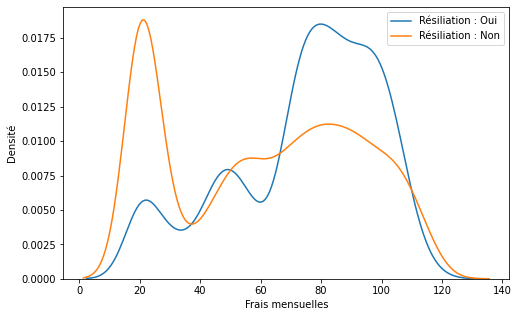

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df.Churn == "Yes","MonthlyCharges"], label = "Résiliation : Oui")
sns.kdeplot(df.loc[df.Churn == "No","MonthlyCharges"], label = "Résiliation : Non")
plt.xlabel("Frais mensuelles")
plt.ylabel("Densité")
plt.legend()

* Les clients ayant des frais mensuelles pas chères  ( >30$) sont moins suceptibles de réislier contrairement aux clients ayant des charges mensuelles élevées.

### Montant des charges totales sur la durée de l'abonemment

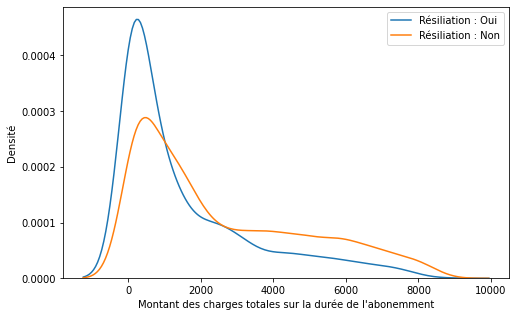

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df.Churn == "Yes","TotalCharges"], label = "Résiliation : Oui")
sns.kdeplot(df.loc[df.Churn == "No","TotalCharges"], label = "Résiliation : Non")
plt.xlabel("Montant des charges totales sur la durée de l'abonemment")
plt.ylabel("Densité")
plt.legend()

* 


### Corrélation

In [ ]:
df[num_col].corr()

,TotalCharges,MonthlyCharges,tenure
TotalCharges,1.000000,0.651065,0.82588
MonthlyCharges,0.651065,1.000000,0.24790
tenure,0.825880,0.247900,1.00000


* La durée de l'abonnement est fortement corrélée avec la somme total des charges. Cela s'explique du fait que cette somme est d'autant important que la durée de l'abonnement est longue.

## Etude des variables qualitatives

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.loc[df.InternetService == "Fiber optic", "Churn"].value_counts(normalize = True)

No     0.581072
Yes    0.418928
Name: Churn, dtype: float64

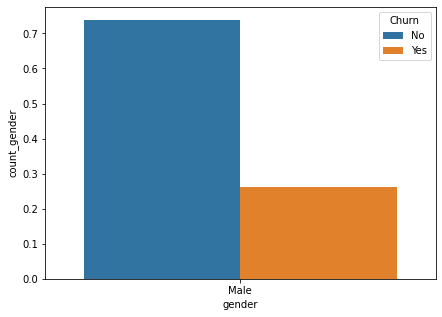

In [ ]:
data = df.groupby("gender")["Churn"].value_counts(normalize = 1).to_frame().rename({"Churn":"count_gender"}, axis = 1).reset_index()
data = data.loc[data.gender == "Male"]
plt.figure(figsize = (7,5))
sns.barplot(x = "gender", y = "count_gender", hue = "Churn", data = data)

In [ ]:
data

,gender,Churn,count
2,Male,No,0.738397
3,Male,Yes,0.261603


[Text(0, 0, '0'), Text(0, 0, '1')]


,SeniorCitizen,Churn,count
0,0,No,0.763938
1,0,Yes,0.236062
2,1,No,0.583187
3,1,Yes,0.416813


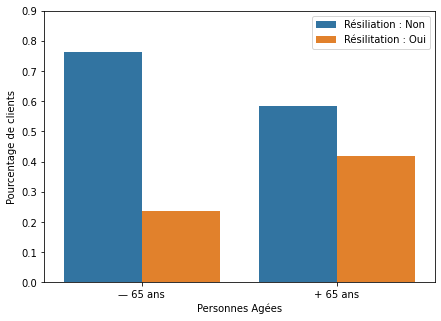

In [ ]:
data_junior  = plot_per(df, "SeniorCitizen", "Personnes Agées", ["— 65 ans", "+ 65 ans"])
data_junior

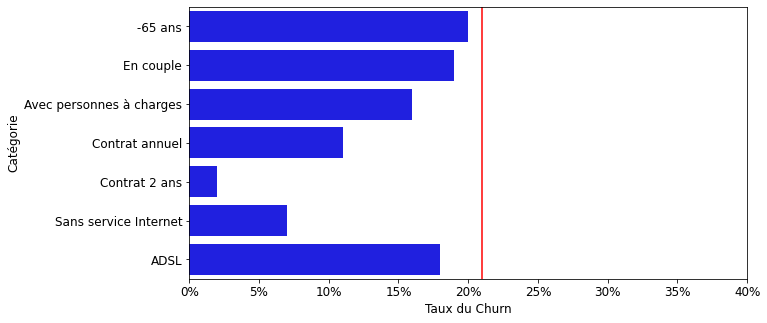

In [ ]:
df_pos = pd.read_csv("Positif.csv", sep = ";")
plt.figure(figsize = (10,5))
ax = sns.barplot(y = "Catégorie", x= "Taux du Churn", data = df_pos, color = "blue")
ax.set(xlim =(0,0.4))
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
ax.axvline(0.21, color = "red")



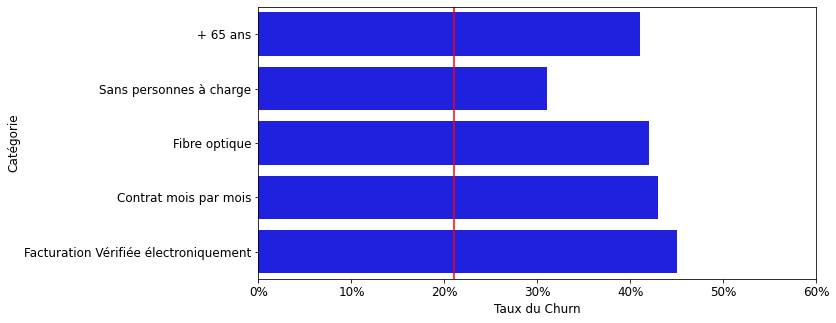

In [ ]:
df_pos = pd.read_csv("negatif.csv", sep = ";")
plt.figure(figsize = (10,5))
ax = sns.barplot(y = "Catégorie", x= "Taux du Churn", data = df_pos, color = "blue")
ax.set(xlim =(0,0.6))
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
ax.axvline(0.21, color = "red")

### Genre

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]


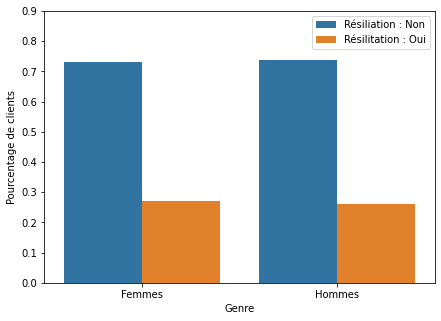

In [ ]:
def plot_per(df, feature, xlabel, xticks, rotation = 0):
  data = df.groupby(feature)["Churn"].value_counts(normalize = 1).to_frame().rename({"Churn":"count"}, axis = 1).reset_index()

  plt.figure(figsize = (7,5))
  ax = sns.barplot(x = feature, y = "count", hue = "Churn", data = data)
  print([i for i in ax.get_xticklabels()])
  plt.xticks(np.arange(len(xticks)),xticks, rotation = rotation)
  plt.xlabel(xlabel)
  plt.ylabel("Pourcentage de clients")
  vals = ax.get_yticks()
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
  L = plt.legend()
  L.get_texts()[0].set_text("Résiliation : Non")
  L.get_texts()[1].set_text("Résilitation : Oui")
  ax.set(ylim =(0,0.9))
  return data

L = plot_per(df, "gender", "Genre", ["Femmes", "Hommes"])


In [ ]:
L

,gender,Churn,count
0,Female,No,0.730791
1,Female,Yes,0.269209
2,Male,No,0.738397
3,Male,Yes,0.261603


### Personnes Agées

[Text(0, 0, '0'), Text(0, 0, '1')]


,SeniorCitizen,Churn,count
0,0,No,0.763938
1,0,Yes,0.236062
2,1,No,0.583187
3,1,Yes,0.416813


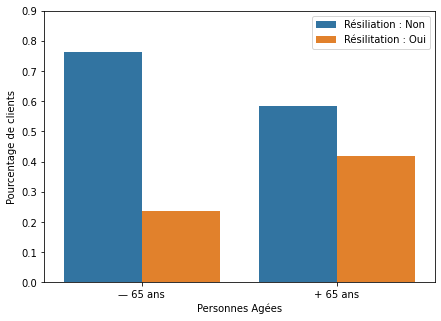

In [ ]:
plot_per(df, "SeniorCitizen", "Personnes Agées", ["— 65 ans", "+ 65 ans"])

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]


,Partner,Churn,count
0,No,No,0.670420
1,No,Yes,0.329580
2,Yes,No,0.803351
3,Yes,Yes,0.196649


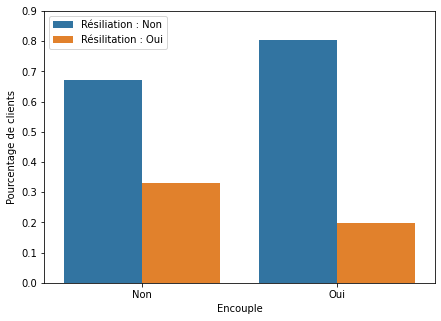

In [ ]:
plot_per(df, "Partner", "Encouple", ["Non", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]


,Dependents,Churn,count
0,No,No,0.687209
1,No,Yes,0.312791
2,Yes,No,0.845498
3,Yes,Yes,0.154502


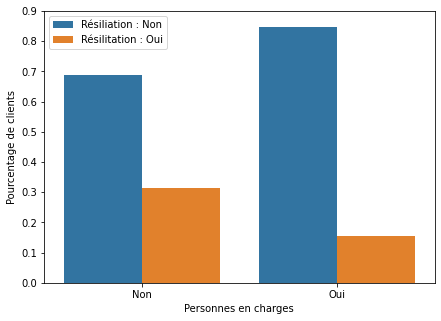

In [ ]:
plot_per(df, "Dependents", "Personnes en charges", ["Non", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]


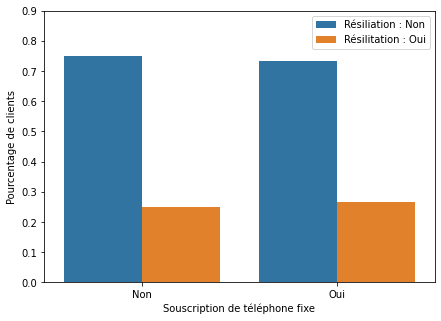

In [ ]:
plot_per(df, "PhoneService", "Souscription de téléphone fixe", ["Non", "Oui"])


[Text(0, 0, 'No'), Text(0, 0, 'No phone service'), Text(0, 0, 'Yes')]


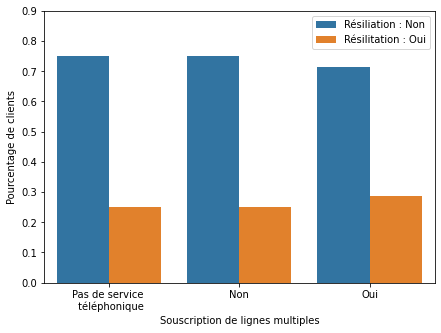

In [ ]:
plot_per(df, "MultipleLines", "Souscription de lignes multiples", ["Pas de service \n téléphonique" ,"Non", "Oui"])

[Text(0, 0, 'DSL'), Text(0, 0, 'Fiber optic'), Text(0, 0, 'No')]


,InternetService,Churn,count
0,DSL,No,0.810409
1,DSL,Yes,0.189591
2,Fiber optic,No,0.581072
3,Fiber optic,Yes,0.418928
4,No,No,0.925950
5,No,Yes,0.074050


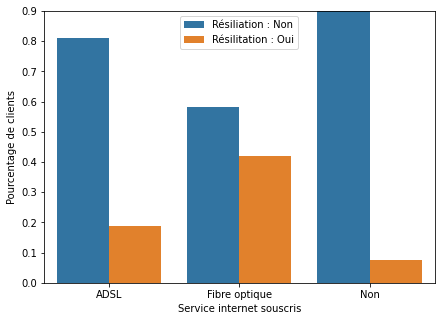

In [ ]:
plot_per(df, "InternetService", "Service internet souscris", ["ADSL" ,"Fibre optique", "Non"])

[Text(0, 0, 'No'), Text(0, 0, 'No internet service'), Text(0, 0, 'Yes')]


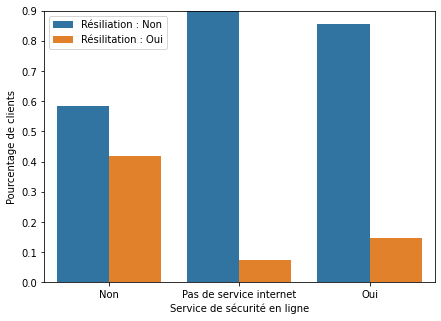

In [ ]:
plot_per(df, "OnlineSecurity", "Service de sécurité en ligne", ["Non" ,"Pas de service internet", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'No internet service'), Text(0, 0, 'Yes')]


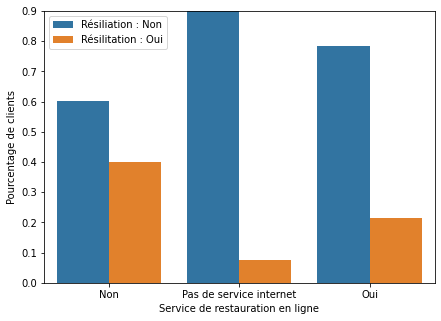

In [ ]:
plot_per(df, "OnlineBackup", "Service de restauration en ligne", ["Non" ,"Pas de service internet", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'No internet service'), Text(0, 0, 'Yes')]


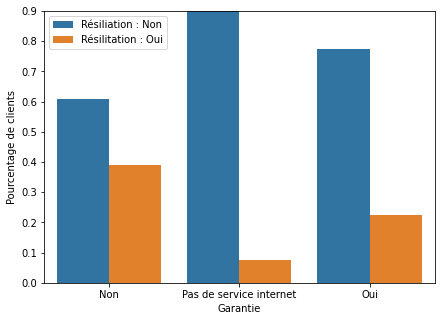

In [ ]:
plot_per(df, "DeviceProtection", "Garantie", ["Non" ,"Pas de service internet", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'No internet service'), Text(0, 0, 'Yes')]


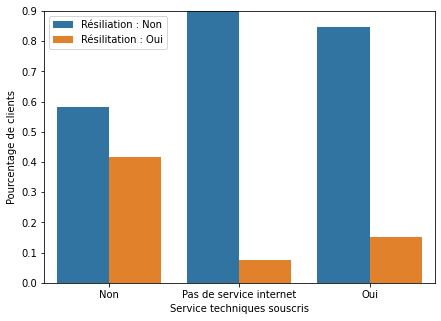

In [ ]:
plot_per(df, "TechSupport", "Service techniques souscris", ["Non" ,"Pas de service internet", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'No internet service'), Text(0, 0, 'Yes')]


,StreamingTV,Churn,count
0,No,No,0.664769
1,No,Yes,0.335231
2,No internet service,No,0.925950
3,No internet service,Yes,0.074050
4,Yes,No,0.699298
5,Yes,Yes,0.300702


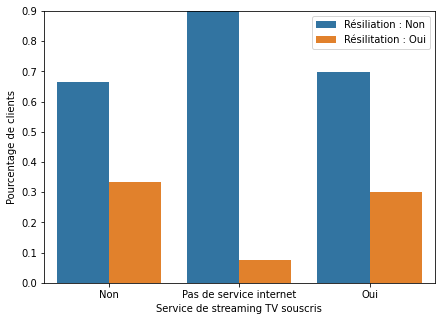

In [ ]:
plot_per(df, "StreamingTV", "Service de streaming TV souscris", ["Non" ,"Pas de service internet", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'No internet service'), Text(0, 0, 'Yes')]


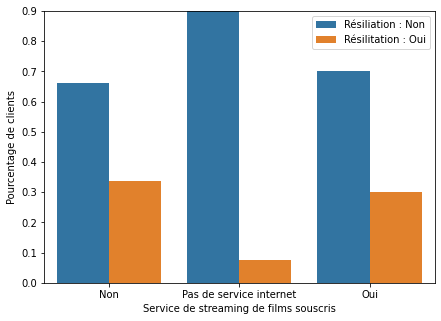

In [ ]:
plot_per(df, "StreamingMovies", "Service de streaming de films souscris", ["Non" ,"Pas de service internet", "Oui"])


[Text(0, 0, 'Month-to-month'), Text(0, 0, 'One year'), Text(0, 0, 'Two year')]


,Contract,Churn,count
0,Month-to-month,No,0.572903
1,Month-to-month,Yes,0.427097
2,One year,No,0.887305
3,One year,Yes,0.112695
4,Two year,No,0.971681
5,Two year,Yes,0.028319


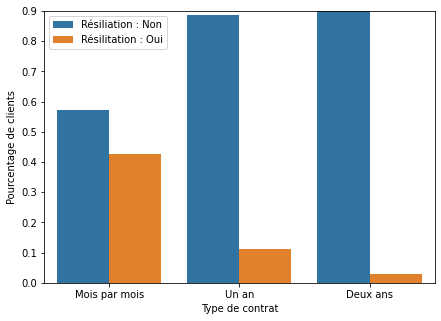

In [ ]:
plot_per(df, "Contract", "Type de contrat", ["Mois par mois" ,"Un an", "Deux ans"])


[Text(0, 0, 'No'), Text(0, 0, 'Yes')]


,PaperlessBilling,Churn,count
0,No,No,0.836699
1,No,Yes,0.163301
2,Yes,No,0.664349
3,Yes,Yes,0.335651


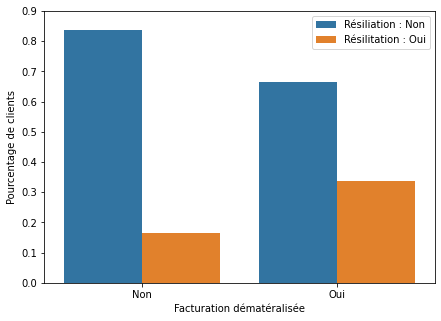

In [ ]:
plot_per(df, "PaperlessBilling", "Facturation dématéralisée", ["Non", "Oui"])


[Text(0, 0, 'Bank transfer (automatic)'), Text(0, 0, 'Credit card (automatic)'), Text(0, 0, 'Electronic check'), Text(0, 0, 'Mailed check')]


,PaymentMethod,Churn,count
0,Bank transfer (automatic),No,0.832902
1,Bank transfer (automatic),Yes,0.167098
2,Credit card (automatic),No,0.847569
3,Credit card (automatic),Yes,0.152431
4,Electronic check,No,0.547146
5,Electronic check,Yes,0.452854
6,Mailed check,No,0.808933
7,Mailed check,Yes,0.191067


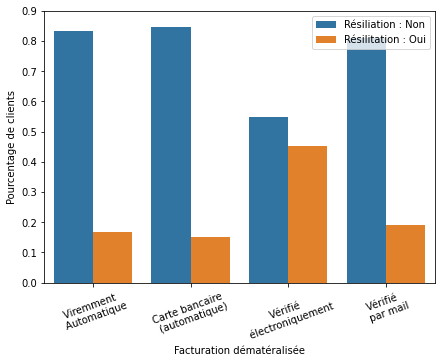

In [ ]:
plot_per(df, "PaymentMethod", "Facturation dématéralisée", ["Viremment \n Automatique", "Carte bancaire \n (automatique)", "Vérifié \n électroniquement", "Vérifié \n par mail"], rotation = 20)